## Classification -- Songs Data

Here I'm applying some common classification algorithms on the songs and glass datasets. The songs dataset captures details about a song year when it is released, title, artist name, loudness pitch, tempo, timbre values etc. All these independent values are used to predict if the song has made it to the top 10 list. I'll apply a logistic regression model to the songs dataset.

Reading the data from dataset

In [1]:
songs_data <- read.csv("../../datasets/songs/songs.csv", fileEncoding="latin1")
head(songs_data)

year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,⋯,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,⋯,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,⋯,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,⋯,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,⋯,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,⋯,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0
2010,Better Off This Way,A Day to Remember,SOCEYON1315CD4A23E,AROBSHL1187B9AFB01,4,1.000,-3.807,160.366,0.347,⋯,91.117,-54.378,53.808,-33.183,54.657,-64.478,34.522,-40.922,36.453,0


In [2]:
str(songs_data)
table(songs_data$year)

'data.frame':	7574 obs. of  39 variables:
 $ year                    : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...
 $ songtitle               : Factor w/ 7141 levels "_\u0084\u008d",..: 6203 5521 238 3113 45 605 252 4417 2884 6756 ...
 $ artistname              : Factor w/ 1032 levels "50 Cent","98 Degrees",..: 3 3 3 3 3 3 3 3 3 12 ...
 $ songID                  : Factor w/ 7549 levels "SOAACNI1315CD4AC42",..: 595 5439 5252 1716 3431 1020 1831 3964 6904 2473 ...
 $ artistID                : Factor w/ 1047 levels "AR00B1I1187FB433EB",..: 671 671 671 671 671 671 671 671 671 507 ...
 $ timesignature           : int  3 4 4 4 4 4 4 4 4 4 ...
 $ timesignature_confidence: num  0.853 1 1 1 0.788 1 0.968 0.861 0.622 0.938 ...
 $ loudness                : num  -4.26 -4.05 -3.57 -3.81 -4.71 ...
 $ tempo                   : num  91.5 140 160.5 97.5 140.1 ...
 $ tempo_confidence        : num  0.953 0.921 0.489 0.794 0.286 0.347 0.273 0.83 0.018 0.929 ...
 $ key                     : 


1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 
 328  196  186  324  198  258  178  329  380  357  363  282  518  434  479  392 
2006 2007 2008 2009 2010 
 479  622  415  483  373 

Let's start by splitting the songs_data dataframe into train and test sets.  We will put songs prior to the year 2009 in the train data and songs in 2010 in the test data. 

In [3]:
#split the data into train and test sets
songs_traindata <- subset(songs_data, year <=2009) 
songs_testdata <- subset(songs_data, year=2010)
head(songs_testdata,2)
head(songs_traindata,2)


year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,⋯,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,⋯,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,⋯,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0


,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,⋯,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
374,2009,The Awkward Goodbye,Athlete,SOUALGK12AB017FC37,ARDW3YJ1187FB4CCE5,3,0.732,-6.320,89.614,0.652,⋯,70.975,-71.776,58.432,-53.816,88.571,-89.816,38.026,-52.075,52.827,0
375,2009,Rubik's Cube,Athlete,SOGPIQC12AB0182B15,ARDW3YJ1187FB4CCE5,3,0.906,-9.541,117.742,0.542,⋯,112.879,-64.470,58.086,-76.937,74.441,-88.244,42.209,-66.812,40.749,0


Now we need to clean the data a bit. Let's remove the following independent variables ("year", "songtitle", "artistname", "songID", and "artistID") from songs_traindata and songs_testdata.

In [4]:
songs_traindata$year <- NULL 
songs_traindata$songtitle <- NULL 
songs_traindata$artistname <- NULL 
songs_traindata$songID <- NULL 
songs_traindata$artistID <- NULL 

songs_testdata$year <- NULL 
songs_testdata$songtitle <- NULL 
songs_testdata$artistname <- NULL 
songs_testdata$songID <- NULL 
songs_testdata$artistID <- NULL 

names(songs_testdata) #check to see if the variables were removed 
names(songs_traindata)
summary(songs_testdata) #now review the summary data with variables removed 

[1] "timesignature"            "timesignature_confidence"
 [3] "loudness"                 "tempo"                   
 [5] "tempo_confidence"         "key"                     
 [7] "key_confidence"           "energy"                  
 [9] "pitch"                    "timbre_0_min"            
[11] "timbre_0_max"             "timbre_1_min"            
[13] "timbre_1_max"             "timbre_2_min"            
[15] "timbre_2_max"             "timbre_3_min"            
[17] "timbre_3_max"             "timbre_4_min"            
[19] "timbre_4_max"             "timbre_5_min"            
[21] "timbre_5_max"             "timbre_6_min"            
[23] "timbre_6_max"             "timbre_7_min"            
[25] "timbre_7_max"             "timbre_8_min"            
[27] "timbre_8_max"             "timbre_9_min"            
[29] "timbre_9_max"             "timbre_10_min"           
[31] "timbre_10_max"            "timbre_11_min"           
[33] "timbre_11_max"            "Top10"

[1] "timesignature"            "timesignature_confidence"
 [3] "loudness"                 "tempo"                   
 [5] "tempo_confidence"         "key"                     
 [7] "key_confidence"           "energy"                  
 [9] "pitch"                    "timbre_0_min"            
[11] "timbre_0_max"             "timbre_1_min"            
[13] "timbre_1_max"             "timbre_2_min"            
[15] "timbre_2_max"             "timbre_3_min"            
[17] "timbre_3_max"             "timbre_4_min"            
[19] "timbre_4_max"             "timbre_5_min"            
[21] "timbre_5_max"             "timbre_6_min"            
[23] "timbre_6_max"             "timbre_7_min"            
[25] "timbre_7_max"             "timbre_8_min"            
[27] "timbre_8_max"             "timbre_9_min"            
[29] "timbre_9_max"             "timbre_10_min"           
[31] "timbre_10_max"            "timbre_11_min"           
[33] "timbre_11_max"            "Top10"

 timesignature   timesignature_confidence    loudness           tempo       
 Min.   :0.000   Min.   :0.0000           Min.   :-42.451   Min.   :  0.00  
 1st Qu.:4.000   1st Qu.:0.8193           1st Qu.:-10.847   1st Qu.: 88.86  
 Median :4.000   Median :0.9790           Median : -7.649   Median :103.27  
 Mean   :3.894   Mean   :0.8533           Mean   : -8.817   Mean   :107.35  
 3rd Qu.:4.000   3rd Qu.:1.0000           3rd Qu.: -5.640   3rd Qu.:124.80  
 Max.   :7.000   Max.   :1.0000           Max.   :  1.305   Max.   :244.31  
 tempo_confidence      key         key_confidence       energy       
 Min.   :0.0000   Min.   : 0.000   Min.   :0.0000   Min.   :0.00002  
 1st Qu.:0.3720   1st Qu.: 2.000   1st Qu.:0.2040   1st Qu.:0.50014  
 Median :0.7015   Median : 6.000   Median :0.4515   Median :0.71816  
 Mean   :0.6229   Mean   : 5.385   Mean   :0.4338   Mean   :0.67547  
 3rd Qu.:0.8920   3rd Qu.: 9.000   3rd Qu.:0.6460   3rd Qu.:0.88740  
 Max.   :1.0000   Max.   :11.000   Max.  

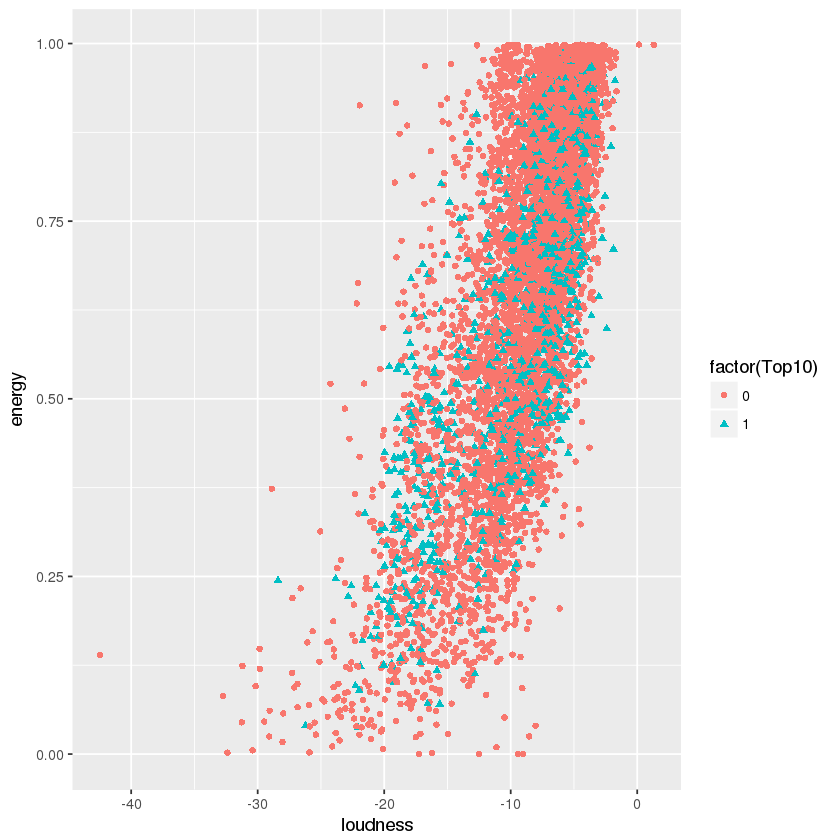

In [5]:
# Now I'll pLot the the variables loudness and energy of songs_traindata with 
# Top10 supplied to color and shape parameters.
library(ggplot2)
songs_plot <- ggplot(songs_traindata, aes(loudness, energy)) + geom_point(aes(colour=factor(Top10),shape=factor(Top10))) 
songs_plot

We can see in the above graph, there is not a clear linear boundary to separate the songs that made it to Top10 and those not.

Let's try to fit a logistic regression model to predict Top10 using all the independent variables. I'll name this model songsLog1.


Call:
glm(formula = Top10 ~ ., family = binomial, data = songs_traindata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9220  -0.5399  -0.3459  -0.1845   3.0770  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.470e+01  1.806e+00   8.138 4.03e-16 ***
timesignature             1.264e-01  8.674e-02   1.457 0.145050    
timesignature_confidence  7.450e-01  1.953e-01   3.815 0.000136 ***
loudness                  2.999e-01  2.917e-02  10.282  < 2e-16 ***
tempo                     3.634e-04  1.691e-03   0.215 0.829889    
tempo_confidence          4.732e-01  1.422e-01   3.329 0.000873 ***
key                       1.588e-02  1.039e-02   1.529 0.126349    
key_confidence            3.087e-01  1.412e-01   2.187 0.028760 *  
energy                   -1.502e+00  3.099e-01  -4.847 1.25e-06 ***
pitch                    -4.491e+01  6.835e+00  -6.570 5.02e-11 ***
timbre_0_min              2.316e-02  4.256e-03  

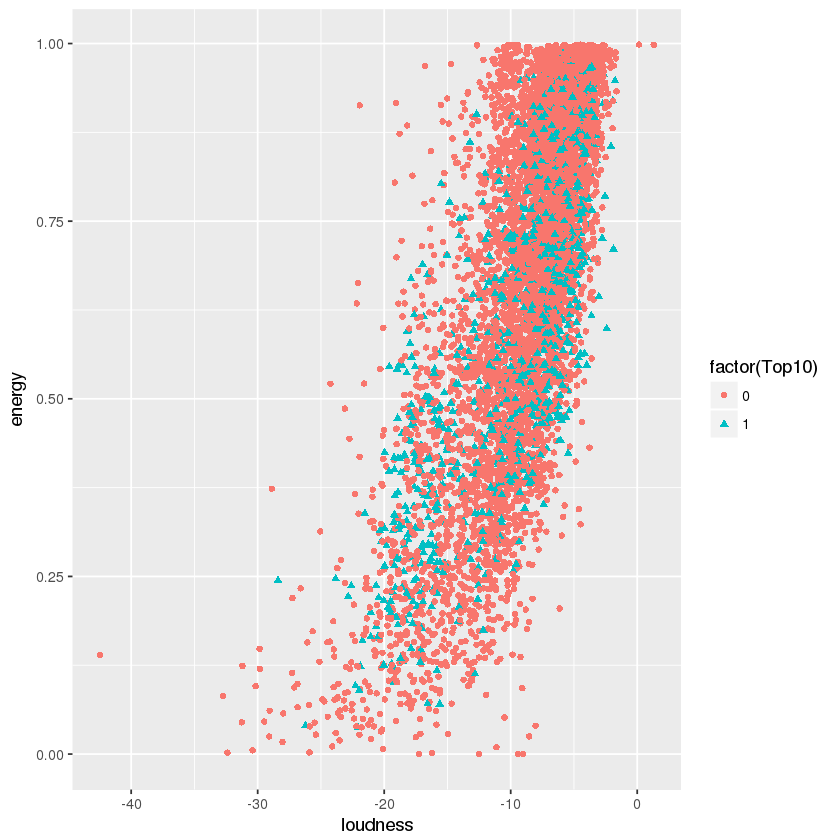

In [6]:
songsLog1 <- glm(Top10 ~., data=songs_traindata, family=binomial)
summary(songsLog1)


songsLog1_slope3 <- coef(songsLog1)[2]/(-coef(songsLog1)[3])
songsLog1_intercept3 <- coef(songsLog1)[1]/(-coef(songsLog1)[3]) 
songs_plot + geom_abline(slope=songsLog1_slope3, intercept=songsLog1_intercept3) # An attempt at some of the other codes shown in the lab

In [7]:
summary(songsLog1)


Call:
glm(formula = Top10 ~ ., family = binomial, data = songs_traindata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9220  -0.5399  -0.3459  -0.1845   3.0770  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.470e+01  1.806e+00   8.138 4.03e-16 ***
timesignature             1.264e-01  8.674e-02   1.457 0.145050    
timesignature_confidence  7.450e-01  1.953e-01   3.815 0.000136 ***
loudness                  2.999e-01  2.917e-02  10.282  < 2e-16 ***
tempo                     3.634e-04  1.691e-03   0.215 0.829889    
tempo_confidence          4.732e-01  1.422e-01   3.329 0.000873 ***
key                       1.588e-02  1.039e-02   1.529 0.126349    
key_confidence            3.087e-01  1.412e-01   2.187 0.028760 *  
energy                   -1.502e+00  3.099e-01  -4.847 1.25e-06 ***
pitch                    -4.491e+01  6.835e+00  -6.570 5.02e-11 ***
timbre_0_min              2.316e-02  4.256e-03  

Now let's try making predictions on the test set using songsLog1 model.

In [8]:
# Run the model on the same data that it was trained with and get the probabilities for each sample. 
glm.probs <- predict(songsLog1, type="response")
# create an array to hold predictions and assign all zeros initially.
glm.pred = rep(0,length(glm.probs))

We'll calculate the accuracy of the model 'songsLog1' on the test set, using a threshold of 0.5 

In [9]:
# based on model's probablities for each sample, assign the class label.
glm.pred[glm.probs>0.5] <- 1
# now we should create a confusion table to see our true positive and false positive
conftable <- table(glm.pred, songs_traindata$Top10)
conftable

# you can always check the math more manually like so...
(6007)/(6007+858) 

        
glm.pred    0    1
       0 6007  858
       1  134  202

[1] 0.8750182

Calculate baseline model accuracy.

In [10]:
# note this should look close to our manual calculations above 
# Compute accuracy
print (paste("accuracy = ",sum(diag(conftable))/length(glm.pred)))


[1] "accuracy =  0.86224135536731"


Now it's time to split the glass_data into train and test subsets. glass_train_data will have 70% data and glass_test_data will have rest 30% of data. 